In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


In [2]:
%pip install numpy
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt 
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


we can see no nan values


<Axes: >

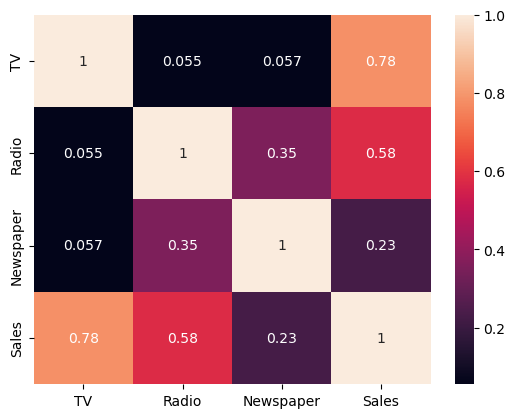

In [8]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

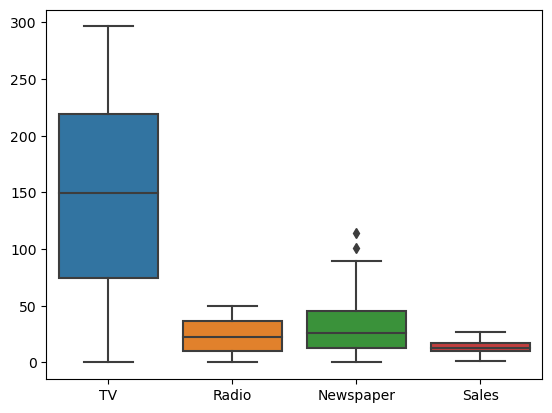

In [9]:
sns.boxplot(df)

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [12]:
df=sc.fit_transform(df)

<Axes: >

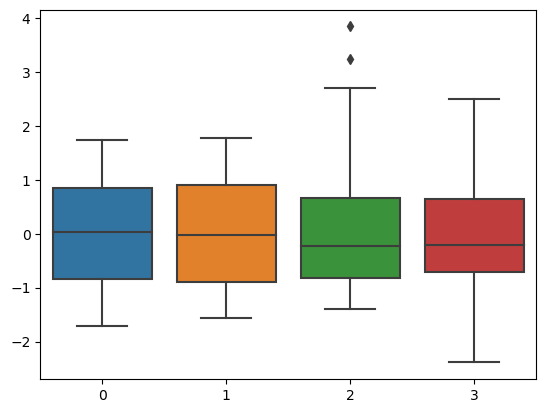

In [13]:
sns.boxplot(df)

In [14]:
df=pd.DataFrame(df)

<Axes: xlabel='2', ylabel='3'>

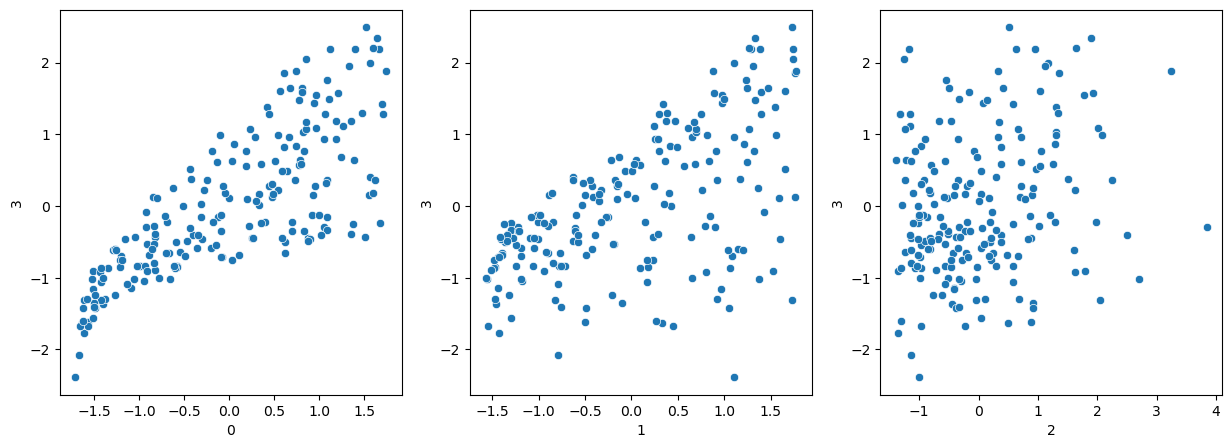

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df[0],y=df[3])
plt.subplot(1,3,2)
sns.scatterplot(x=df[1],y=df[3])
plt.subplot(1,3,3)
sns.scatterplot(x=df[2],y=df[3])


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


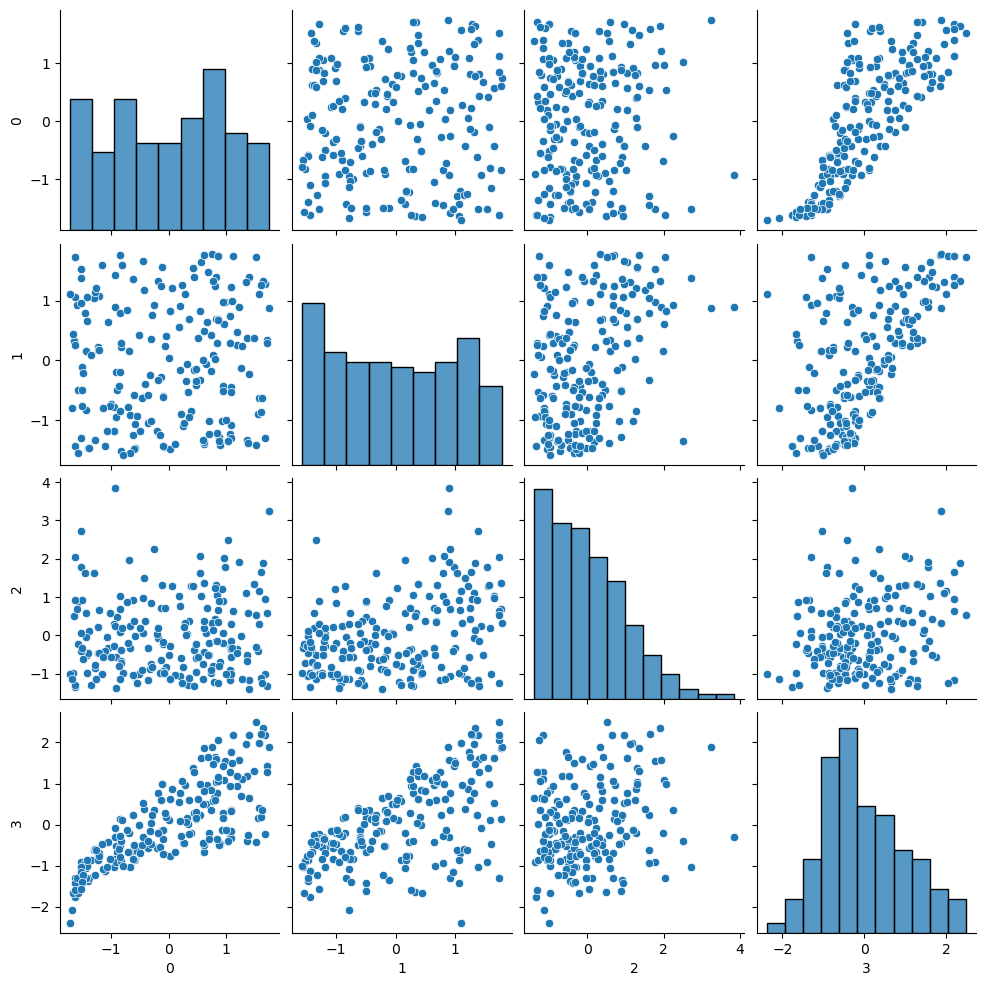

In [16]:
sns.pairplot(df)

In [17]:
df=pd.DataFrame(df)
df

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [18]:
x=df[[0,1,2]]
y=df[3]

In [19]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
X_train.shape

(134, 3)

In [21]:
y_train.shape

(134,)

In [22]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [23]:
lr=LinearRegression()
lrr2=Ridge(alpha=0.1)
lrr1=Lasso(alpha=0.1)
lrrEn=ElasticNet(random_state=0,alpha=.1)

In [24]:
lr.fit(X_train,y_train)
lrr2.fit(X_train,y_train)
lrr1.fit(X_train,y_train)
lrrEn.fit(X_train,y_train)

ElasticNet(alpha=0.1, random_state=0)

In [25]:
y_pred=lr.predict(X_test)

In [26]:
from sklearn.metrics import r2_score,mean_absolute_error

In [27]:
linear=r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred)
linear

(0.8555568430680086, 0.28702174783180556)

In [28]:
y_pred=lrr2.predict(X_test)
ridge=r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred)
ridge

(0.8555438120339384, 0.2870169401948432)

In [29]:
y_pred=lrr1.predict(X_test)
lasso=r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred)
lasso

(0.8458660189800241, 0.28734426664660323)

In [30]:
y_pred=lrrEn.predict(X_test)
elastic=r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred)
elastic

(0.8506801707655605, 0.2856742867966452)

In [31]:
lr.intercept_,lr.coef_

(0.012151496733299808, array([0.73497302, 0.55953106, 0.0253556 ]))